PROBLEM  STATEMENT: Predict the Magnitude of Earthquake


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
data=pd.read_csv("earthquake_data_tsunami.csv")

In [62]:
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [63]:
data.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


In [64]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [65]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


To predict magnitude we can drop year,month and also cdi , mmi and tsunami because these are the after effects of earthquack and the intensity of magnitude so to predict magnitude we can drop that.

In [66]:
data.drop(["cdi", "mmi", "Year", "Month", "tsunami"], axis=1, inplace=True)

In [67]:
data.head()

,magnitude,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,670,131,4.998,27.0,624.464,-25.5948,178.278


EDA

UNIVARIANT ANALYSIS

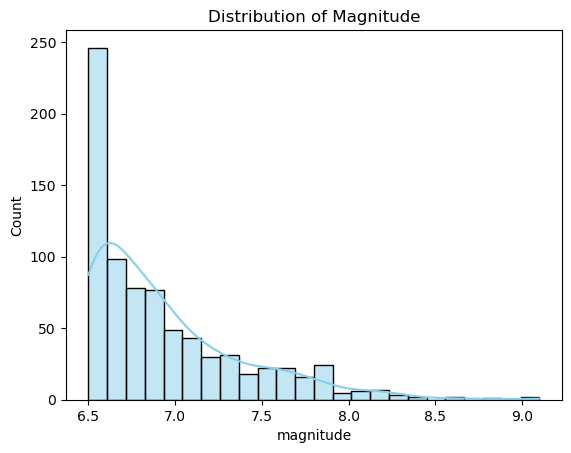

In [68]:
sns.histplot(data['magnitude'], kde=True, color='skyblue')
plt.title('Distribution of Magnitude')
plt.show()

In [69]:
data['magnitude'].skew() # heavy skewness is there but for tree based algorithm skewness is not a problem as it is robust to skewness

np.float64(1.4444399877408625)

BIVARIANT ANALYSIS

In [70]:
data.head()

,magnitude,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,670,131,4.998,27.0,624.464,-25.5948,178.278


sig=sig is a measure of the earthquake's total consequence.

nst= nst tells you the quantity of data collected.
If nst is HIGH (e.g., 300)	: Meaning: Many stations (people) recorded the earthquake.	
Significance: The earthquake was probably large and its measurements are likely accurate because many sources confirmed the data.

nst is low: Significance: The earthquake was either small or occurred in a remote area with poor coverage.
Meaning: Only a few stations (people) recorded the earthquake.


dmin: dmin tells you the quality and clarity of the best piece of data collected.
If dmin is SMALL (close to 0): Meaning: There was a station right on top of or very close to the earthquake's location. 
Significance: The location and time of the earthquake can be determined with very high precision because it was recorded clearly nearby.

if dmin is large: : The nearest station was very far away.The data is less precise because the waves had to travel a long distance before being recorded.

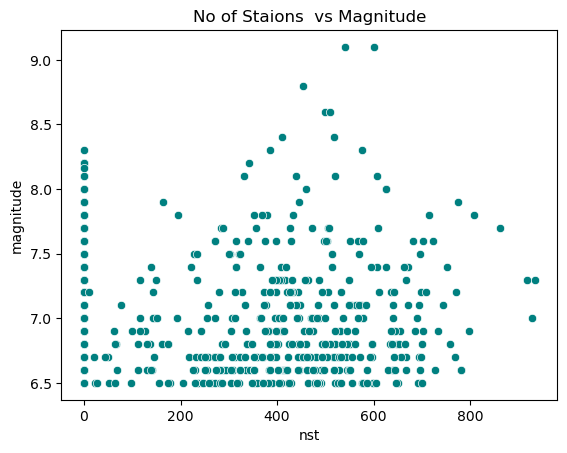

In [71]:
sns.scatterplot(x='nst', y='magnitude', data=data, color='teal')
plt.title('No of Staions  vs Magnitude')
plt.show()


As the magnitude of the earthquake increases, the nst value also tends to increase. This relationship is not perfectly linear, but the clustering of points clearly moves up and to the right.

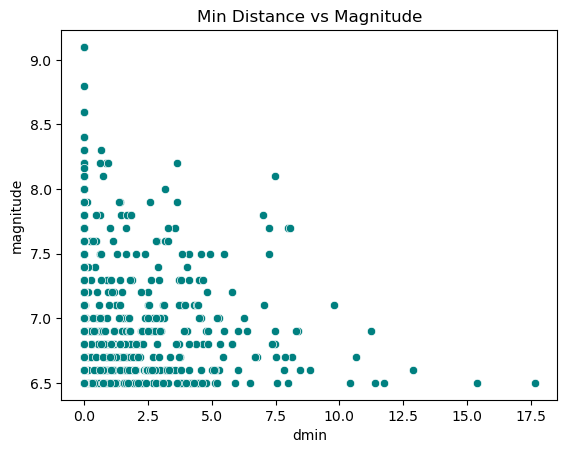

In [72]:
sns.scatterplot(x='dmin', y='magnitude', data=data, color='teal')
plt.title('Min Distance vs Magnitude')
plt.show()


When dmin value is less, the staion is nearer so the magnitude is defined with high precision
When dmin value is more, the staion is far so magnitude is less precise as waves has to travel long distance before being recorded.

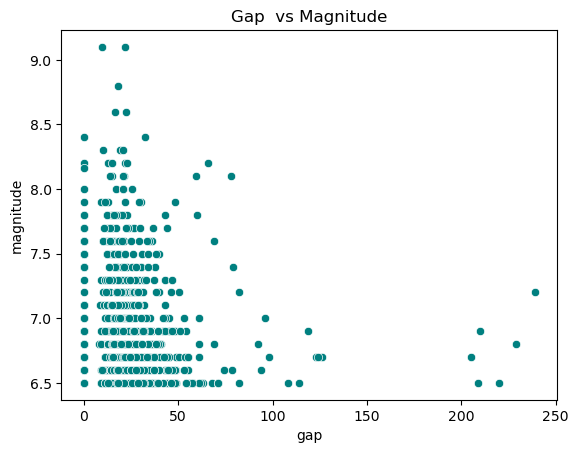

In [75]:
sns.scatterplot(x='gap', y='magnitude', data=data, color='teal')
plt.title('Gap  vs Magnitude')
plt.show()


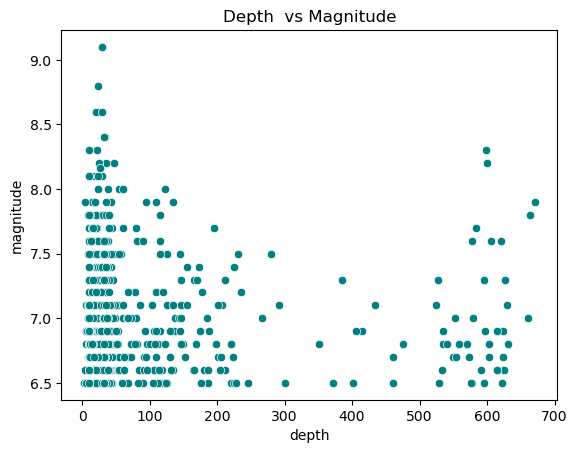

In [76]:
sns.scatterplot(x='depth', y='magnitude', data=data, color='teal')
plt.title('Depth  vs Magnitude')
plt.show()


Depth predict impact not the magnitude value
High Magnitude at Low Depth = High Impact (Shaking & Tsunami Risk)

High Magnitude at High Depth = Low Impact (Shaking)

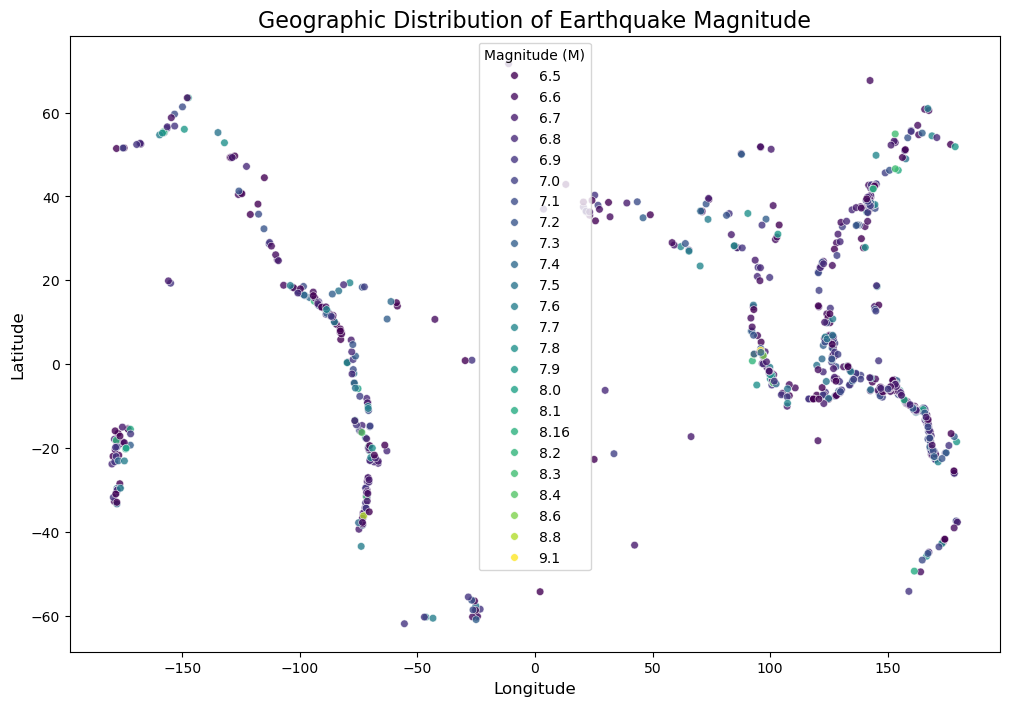

In [77]:
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='magnitude',
    data=data,
    palette='viridis', # A good palette for continuous data
    s=30, # size of the dots
    alpha=0.8,
    legend='full'
)

# Add title and labels
plt.title('Geographic Distribution of Earthquake Magnitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
scatterplot.legend_.set_title('Magnitude (M)')

MULTIVARIANT ANALYSIS

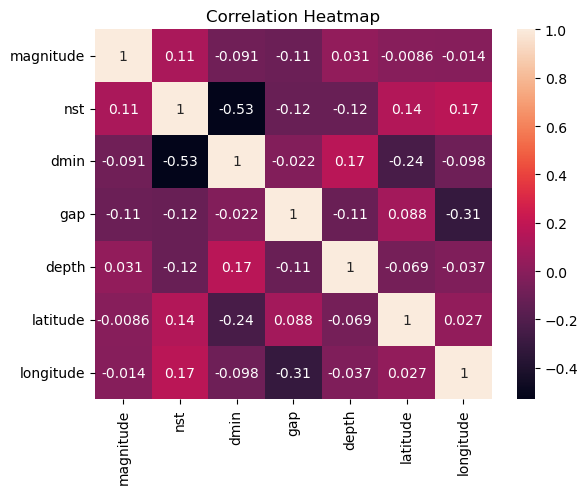

In [78]:
sns.heatmap(data.drop([ "sig"],axis=1).corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()


nst- .11-Moderate positive corelation This is the strongest independent predictor left. It acts as a proxy for size because larger events are detected by more stations.

depth-.03-weak positiv,eConfirms that depth alone is a weak predictor of size, but it's important for tectonic context.

latitude& longitude: Location features (like time) rarely show strong linear correlation, but they are crucial for capturing spatial patterns (hot spots).

In [79]:
data.drop('sig', axis=1, inplace=True)

In [80]:
data.head()

,magnitude,nst,dmin,gap,depth,latitude,longitude
0,7.0,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,131,4.998,27.0,624.464,-25.5948,178.278


TRAIN-TEST SPLIT

In [81]:
from sklearn.model_selection import train_test_split
X=data.drop('magnitude', axis=1)
y=data['magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
X

,nst,dmin,gap,depth,latitude,longitude
0,117,0.509,17.0,14.000,-9.7963,159.596
1,99,2.229,34.0,25.000,-4.9559,100.738
2,147,3.125,18.0,579.000,-20.0508,-178.346
3,149,1.865,21.0,37.000,-19.2918,-172.129
4,131,4.998,27.0,624.464,-25.5948,178.278
...,...,...,...,...,...,...
777,427,0.000,0.0,60.000,13.0490,-88.660
778,0,0.000,0.0,36.400,56.7744,-153.281
779,372,0.000,0.0,103.000,-14.9280,167.170
780,64,0.000,0.0,33.000,6.6310,126.899


In [83]:
y

0      7.0
1      6.9
2      7.0
3      7.3
4      6.6
      ... 
777    7.7
778    6.9
779    7.1
780    6.8
781    7.5
Name: magnitude, Length: 782, dtype: float64

In [53]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) 

RANDOM FOREST

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R² Score:", r2_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


Random Forest Results:
R² Score: -0.1932810734528363
MAE: 0.3270242038216566
RMSE: 0.40588471646186053


In [86]:
import xgboost as xgb

In [87]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Standard objective for regression
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost R² Score: -0.3043
XGBoost MAE: 0.3377
XGBoost RMSE: 0.4243
